# Preparando nossos dados

In [8]:
# Vamos adquirir o dataset, baixando o e salvando em nosso local /tmp/
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip

--2022-04-28 11:58:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 64.233.183.128, 142.250.152.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   176MB/s    in 0.8s    

2022-04-28 11:58:58 (176 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [9]:
# O seguinte código, utilizamos para conseguir extrair os arquivos que foram baixados usando comandos de sistema operacional (OS)
import os
import zipfile
 
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

Agora com os nossos dados em mãos, precisamos separar dois conjuntos para depois conseguirmos identificar o que é um humano ou um cavalo.

In [10]:
# Diretório com nossas fotos de treinamentos de cavalo
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
 
# Diretório com nossas fotos de treinamentos de humano
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Vamos separar humano de cavalo 
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse35-9.png', 'horse17-4.png', 'horse31-7.png', 'horse46-4.png', 'horse23-7.png', 'horse40-8.png', 'horse44-3.png', 'horse30-3.png', 'horse37-3.png', 'horse33-3.png']
['human11-21.png', 'human12-22.png', 'human12-19.png', 'human10-10.png', 'human16-03.png', 'human08-11.png', 'human11-15.png', 'human08-04.png', 'human14-15.png', 'human15-06.png']


In [11]:
# Analisando totais de humanos e cavalos existente em nossos dados
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


# Análise exploratória dos dados

In [12]:
# Vamos importar a biblioteca matplot para trabalhar com gráficos/imagens e configurar alguns parâmetros para melhor entendimento
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
# Parametros para nosso gráfico; vamos deixar a saída das imagens em 4x4 
nrows = 4
ncols = 4
 
# Indíce para iteração sobre as imagens 
pic_index = 0

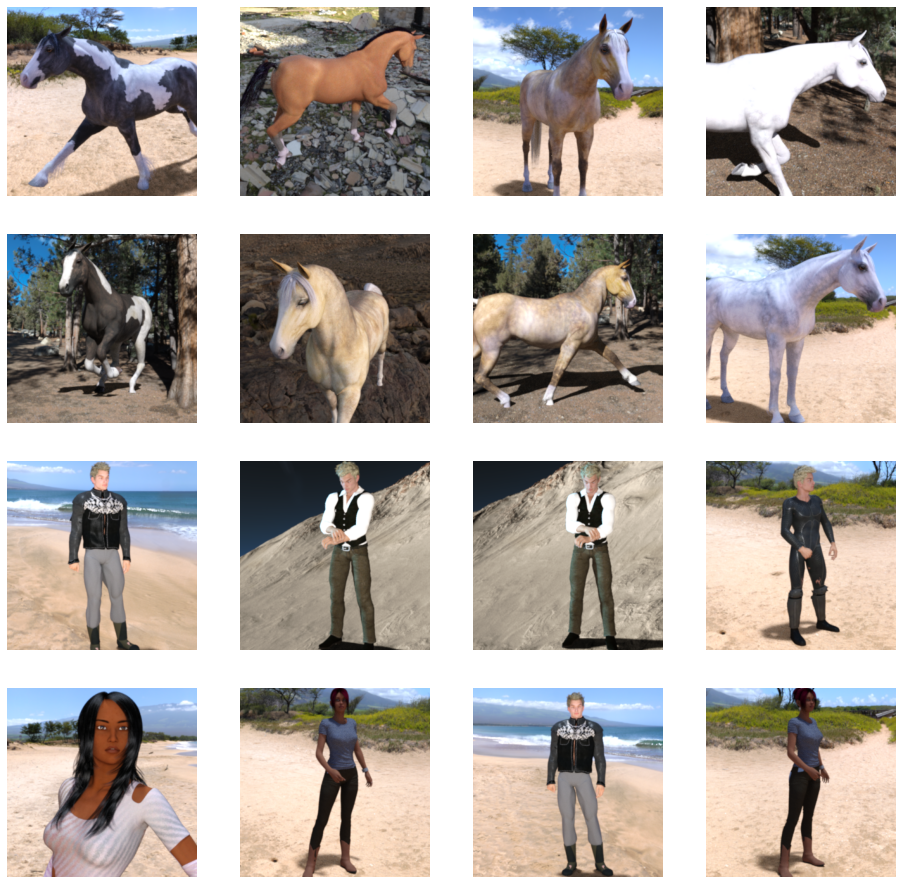

In [13]:
# Agora vamos pegar oito diferentes fotos de humanos e cavalo, para entendermos melhor nossos dados

# Configurando matplotlib fig para caber imagens 4x4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
 
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]
 
for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Preparando subplot; onde seus indices começam em 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Não mostrar gridlines
 
  img = mpimg.imread(img_path)
  plt.imshow(img)
 
plt.show()

# Definindo o modelo de Deep Learning 

Vamos trabalhar utilizando Convolutional Neural Network (CNN) para conseguirmos classifcar nossas imagens.

Detalhe que estamos trabalhando com um problema de classificação binário, ou seja possui duas saidas, logo nossa rede neural será uma sigmoid activation(função sigmoid, cuja entrada de valores é transformado em valores de 0.0 até 1.0) codificando que a probabilidade da imagem mostrada seja de uma classe 1, oposta da classe 0.

In [14]:
# Vamos importar a biblioteca tensorflow para trabalharmos com redes neurais
import tensorflow as tf

In [16]:
# Configurando parâmetros de nosso modelo
model = tf.keras.models.Sequential([
    # A tamanho da entrada desejado é de 300x300 com 3 bytes de cores
    # Primeira convulação(filtros sobre cada pixel da imagem)
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Segunda convulação
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Terceira convulação
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Quarta convulação
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Quinta convulação
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # 512 camadas de neurônios escondidadas
    tf.keras.layers.Dense(512, activation='relu'),
    # Apenas 1 neurônio de saida. Que irá conter valores de 0-1 onde 0 para a classe ('cavalos') e 1 para a nossa outra classe ('humanos')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
#Vamos ver um sumário de nossa rede
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [20]:
# Precisamos agora  compilar nosso modelo , para isso vamos configurar uns parâmetros para quando fomos treinar ele, possuir uma melhor acurácia.

from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',  # treinando nosso modelo com binary_crossentropy loss porque é uma classificaçãp binária e nossa ativação final é uma função sigmoid
              optimizer=RMSprop(lr=0.001), # vamos aplicar um filtro otimizador para que nosso modelo aprenda mais rápido
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


# Treinando nosso modelo

Vamos treinar nossa imagem com data generator, cuja função é ler as imagens de nossos diretórios, converter elas para float32 tensors(arrays muldimensionais), e alimentar elas(com seus devidos nomes) para nossa rede.

Para isso precisamos ter dois geradores, sendo um para imagem e outro para validação, com tamanho 300x300 e seus rótulos(nomes) em binários 

0 para cavalo e 1 para humano

Dados que vão para rede neural precisam ser normalizados de alguma forma para tornar-los mais receptivos durante o processamento da rede, é incomum alimentar pixels sem tratamentos em um modelo CNN, em nosso caso, vamos pré processá-las as imagens normalizando seus pixels para caber no range de 0 à 1 (originalmente os valores estão no range de 0 á 255)

Com o Keras, isso pode ser resolvido utilizando o **keras.preprocessing.image.imageDataGenerator** usando o parâmetro de rescalemento.

In [22]:
# Biblioteca para processar imagem e rescalar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# Todas imagens serão rescladas por 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # Diretório de nossas imagens
        target_size=(300, 300),  # Todas imagens serão rescaladas para 150x150, metade de 300 no caso
        batch_size=128,
        # Como estamos trabalhando com binary_crossentropy loss, precisamos de rótulos binários
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [23]:
# Vamos agora treina-las por 15 épocas(periodos)
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 86s 10s/step - loss: 1.1569 - acc: 0.5217
Epoch 2/15
8/8 [==============================] - 85s 10s/step - loss: 0.6191 - acc: 0.6774
Epoch 3/15
8/8 [==============================] - 81s 10s/step - loss: 0.4662 - acc: 0.7642
Epoch 4/15
8/8 [==============================] - 81s 10s/step - loss: 0.8675 - acc: 0.8065
Epoch 5/15
8/8 [==============================] - 81s 10s/step - loss: 0.3818 - acc: 0.8454
Epoch 6/15
8/8 [==============================] - 92s 11s/step - loss: 0.1920 - acc: 0.9219
Epoch 7/15
8/8 [==============================] - 86s 11s/step - loss: 0.2070 - acc: 0.9266
Epoch 8/15
8/8 [==============================] - 82s 10s/step - loss: 0.5645 - acc: 0.8532
Epoch 9/15
8/8 [==============================] - 80s 10s/step - loss: 0.1464 - acc: 0.9399
Epoch 10/15
8/8 [==============================] - 80s 10s/step - loss: 0.1072 - acc: 0.9611
Epoch 11/15
8/8 [==============================] - 80s 10s/step - loss: 0.1112 

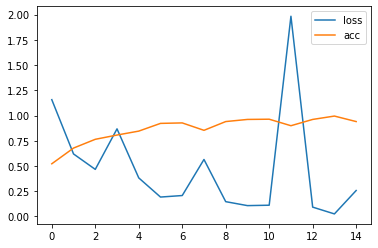

In [40]:
# Vamos verificar nosso gráfico de perda e acurácia durante o processo de treinamento
import pandas as pd

history_df = pd.DataFrame(history.history)

history_df['loss'].plot();
history_df['acc'].plot();
plt.legend();

In [42]:
#Vamos salvar nosso modelo após os treinos para podermos utilizar mais tarde ou chamá-los em outro momento
model.save('classificador.h5')

In [43]:
#Caso precise importar o modelo, basta realizar seu carregamento
#from keras.models import load_model
#model = load_model('classificador.h5')

# Testando o modelo de machine learning

Vamos testar o nosso modelo, o código deixará você escolher imagens/arquivos de seu sistema. Ele vai ser upado e rodará pelo processo de redes neurais do nosso modelo criado, indicando se é um humano ou cavalo

Detalhe que você pode testar com imagens da internet, porém a rede ainda possui vários erros apesar do fato de ter uma alta acurácia na identificação. Isso pode ser explicado por causa do Overfitting de nossos dados, ela foi treinada com muita pouca imagem de cada classe, uma das soluções para melhorarmos nosso código seria aumentar nosso banco de dados de imagem para quando formos treinar, o modelo poder conhecer mais exemplos de pessoas e cavalos.

In [39]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # prevendo imagens
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " é um humano")
  else:
    print(fn + " é um cavalo")

Saving elon musk.jpg to elon musk (1).jpg
Saving cavalo.jpg to cavalo (1).jpg
[1.]
elon musk.jpg é um humano
[0.]
cavalo.jpg é um cavalo


[Imagem do Elon Musk utilizada](https://capitalist.com.br/wp-content/uploads/2021/07/elon-musk-1.jpg)

[Imagem do cavalo utilizada](https://cptstatic.s3.amazonaws.com/imagens/enviadas/materias/materia16043/caracteristicas-cavalos-saudaveis-artigos-cursos-cpt.jpg)

# Refêrencias utilizadas

https://developers.google.com/codelabs/tensorflow-5-compleximages#0

https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a

https://laurencemoroney.com/datasets.html